## London Air Quality - Sulphur Dioxide (SO2) 
Sulphur Dioxide(SO2) information from some sites - boroughs:
   * Brent - Ikea (BT4)
   * Brent - John Keble Primary School (BT6)
   * Enfield - Derby Road (EN4) 
   * Barking and Dagenham - Rush Green (BG1)
   * Bexley - Slade Green (BX1)
   * Camden - Bloomsbury(BL0)
   
From 01/01/2020 to 01/12/2021 <br>
Dataset Source: https://www.londonair.org.uk/london/asp/dataspecies.asp?species=SO2

<strong> This project is a Cleaning Data project, with a little analysis of datas</strong>


### What is Sulphur Dioxide (SO2)
<p>Sulphur dioxide (SO2) is colourless gas with a strong odour which is produced when a material, or fuel, containing sulphur is burned. In the UK the major contributors are coal and oil burning by industry such as power stations and refineries. Sulphur dioxide pollution episodes can occur where there is widespread domestic use of coal or in the vicinity of coal- or oil-fired power stations. Short-term exposure to high levels of sulphur dioxide may cause coughing, tightening of the chest and narrowing of the airways. Although concentrations in this country present a low direct risk to human health, it can cause pollution in other ways, mainly by contributing to the formation of <a href="https://www.londonair.org.uk/LondonAir/guide/WhatIsPM.aspx">Particles(PM)</a></p>

<a href="https://www.londonair.org.uk/LondonAir/guide/WhatIsSO2.aspx">Source</a>

imports needed libs:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Let's cleaning data!

In [2]:
london_airq = pd.read_csv("datasets/LondonAirQuality.csv")
london_airq.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,BG1,SO2,01/01/2020 00:00,NaN,ppb,R
1,BG1,SO2,01/01/2020 01:00,0.4,ppb,R
2,BG1,SO2,01/01/2020 02:00,0.8,ppb,R
3,BG1,SO2,01/01/2020 03:00,1.1,ppb,R
4,BG1,SO2,01/01/2020 04:00,1.1,ppb,R


In [3]:
london_airq.shape

(100800, 6)

In [4]:
london_airq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100800 entries, 0 to 100799
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Site                     100800 non-null  object 
 1   Species                  100800 non-null  object 
 2   ReadingDateTime          100800 non-null  object 
 3   Value                    45955 non-null   float64
 4   Units                    100800 non-null  object 
 5   Provisional or Ratified  100800 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.7+ MB


With this info, we can see that:
* ReadingDateTime is not on datetime64 dtype
* Value column has many of NaN values

In [5]:
london_airq["ReadingDateTime"] = pd.to_datetime(london_airq["ReadingDateTime"])

In [6]:
london_airq.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,BG1,SO2,2020-01-01 00:00:00,NaN,ppb,R
1,BG1,SO2,2020-01-01 01:00:00,0.4,ppb,R
2,BG1,SO2,2020-01-01 02:00:00,0.8,ppb,R
3,BG1,SO2,2020-01-01 03:00:00,1.1,ppb,R
4,BG1,SO2,2020-01-01 04:00:00,1.1,ppb,R


In [7]:
london_airq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100800 entries, 0 to 100799
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Site                     100800 non-null  object        
 1   Species                  100800 non-null  object        
 2   ReadingDateTime          100800 non-null  datetime64[ns]
 3   Value                    45955 non-null   float64       
 4   Units                    100800 non-null  object        
 5   Provisional or Ratified  100800 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 3.1+ MB


In [8]:
london_airq.describe()

,Value
count,45955.000000
mean,0.929272
std,0.949274
min,-1.900000
25%,0.300000
50%,0.700000
75%,1.400000
max,6.100000


We see why probably values is NaN. But min is -1.9. It means that NaN values is put there because not it was not recorded. <br>
We can see which values is NaN:

In [9]:
london_airq[london_airq.Value.isna()]

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,BG1,SO2,2020-01-01 00:00:00,NaN,ppb,R
483,BG1,SO2,2020-01-21 03:00:00,NaN,ppb,R
745,BG1,SO2,2020-01-02 01:00:00,NaN,ppb,R
801,BG1,SO2,2020-03-02 09:00:00,NaN,ppb,R
1163,BG1,SO2,2020-02-18 11:00:00,NaN,ppb,R
...,...,...,...,...,...,...
100795,EN4,SO2,2021-11-30 19:00:00,NaN,ppb,P
100796,EN4,SO2,2021-11-30 20:00:00,NaN,ppb,P
100797,EN4,SO2,2021-11-30 21:00:00,NaN,ppb,P
100798,EN4,SO2,2021-11-30 22:00:00,NaN,ppb,P


We can see which Sites have been here

In [10]:
london_airq["Site"].value_counts()

BG1    16800
BT4    16800
BX1    16800
BT6    16800
BL0    16800
EN4    16800
Name: Site, dtype: int64

We can see which Sites that have NaN values to drop it

In [11]:
london_airq.loc[london_airq["Value"].isna(), "Site"].value_counts()

BT4    16800
BT6    16800
EN4    16800
BL0     3174
BG1     1212
BX1       59
Name: Site, dtype: int64

Let's drop these Sites don't have any Value. 

In [12]:
london_airq = london_airq[london_airq["Site"].isin(["BT6", "BT4", "EN4"]) == False]
london_airq.loc[london_airq["Value"].isna(), "Site"].value_counts()

BL0    3174
BG1    1212
BX1      59
Name: Site, dtype: int64

In [13]:
london_airq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50400 entries, 0 to 83999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Site                     50400 non-null  object        
 1   Species                  50400 non-null  object        
 2   ReadingDateTime          50400 non-null  datetime64[ns]
 3   Value                    45955 non-null  float64       
 4   Units                    50400 non-null  object        
 5   Provisional or Ratified  50400 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.9+ MB


How has more or less 5% of nan values, we can exclude them because no columns explains that why has NaN values, showing a probability these nan values is generate on errors in collectors SO3 machines in each site/borough

In [14]:
london_airq.dropna(inplace=True)

In [15]:
london_airq.describe()

,Value
count,45955.000000
mean,0.929272
std,0.949274
min,-1.900000
25%,0.300000
50%,0.700000
75%,1.400000
max,6.100000


Let's see unique values columns

In [16]:
london_airq.select_dtypes(include="object").apply(pd.Series.unique)

Site                       [BG1, BX1, BL0]
Species                              [SO2]
Units                                [ppb]
Provisional or Ratified             [R, P]
dtype: object

Let's plot a line graph to see increased sulphur dioxide(SO2) by Site only to know how data is comported.

Text(0.5, 1.0, 'Sulphur Dioxide by Site in 2020')

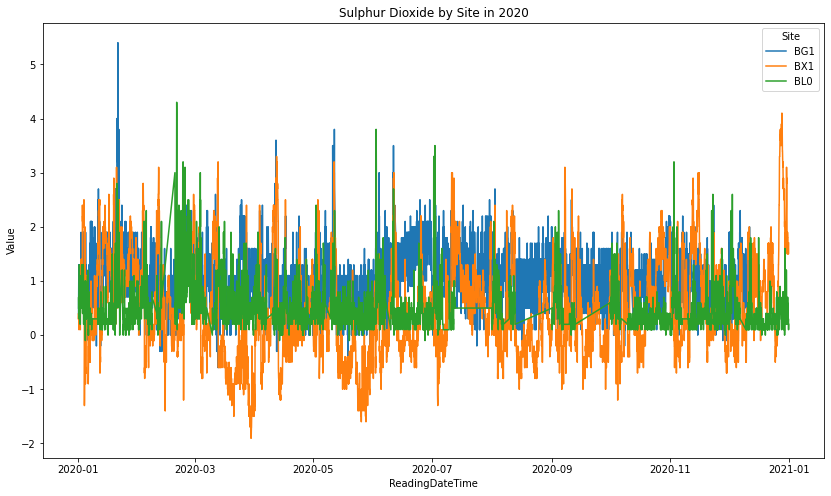

In [17]:
specific_time_df = london_airq[london_airq["ReadingDateTime"].dt.to_period("M") < "2021-01"]

plt.figure(figsize=(14, 8))
sns.lineplot(x="ReadingDateTime", y="Value", hue="Site", data=specific_time_df)
plt.title("Sulphur Dioxide by Site in 2020")

Now convert this dataset to csv and save it.

In [18]:
london_airq.to_csv("datasets/LondonAirQualitySO2Cleaned.csv")

### Resume
* <em>Parse date time column `ReadingDateTime` to datetime64[ns] dtype </em>
* <em>Drop the sites don't have Value data </em>
* <em>Exclude NaN Values to clean dataset </em>
* <em>Plotted some line plots to see how data was comported </em>
* <em>Exports the dataset cleaned to CSV </em>